In [ ]:
from train_model import *
from preprocess import BioData
from utils import *

RDKit WARNING: [14:39:20] Enabling RDKit 2019.09.3 jupyter extensions
[14:39:20] Enabling RDKit 2019.09.3 jupyter extensions


In [ ]:
data_names = ['HMDDv4.0','miRBase', 'DTI']
data_id = 0
data_name = data_names[data_id]
datapath = Data_paths(f'./data/{data_names[data_id]}/')
device = torch.device(f'cuda:0' if torch.cuda.is_available() else 'cpu')
biodata = BioData(datapath.md,
                    mss_list=datapath.mm,
                    dss_list=datapath.dd,
                    device=device,
                    data_name=data_names[data_id])

Kmeans get Di sim of {df}
Kmeans get Di sim of {df}


In [3]:
results, model = train_model(biodata)

/home/ybliu/.conda/envs/tg2/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/mnt/data/ybliu/63server/paper10_改进/code_all/experiments/Cold_start_experiment/train_model.py:99: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_true = torch.tensor(y_train_true)


Epoch: 010, Loss: 0.3536
Val AUC: 0.9307737705305029
 auc:0.9308 ,aupr:0.9264,f1_score:0.8591, accuracy:0.8725, recall:0.8416, specificity:0.8989, precision:0.8773
Total execution time for 10 epochs: 0 hours, 0 minutes, 0 seconds
Epoch: 020, Loss: 0.3363
Val AUC: 0.9476582095453928
 auc:0.9477 ,aupr:0.9412,f1_score:0.8721, accuracy:0.8824, recall:0.8682, specificity:0.8947, precision:0.8762
Total execution time for 20 epochs: 0 hours, 0 minutes, 1 seconds
Epoch: 030, Loss: 0.3321
Val AUC: 0.9572121598413625
 auc:0.9572 ,aupr:0.9484,f1_score:0.8809, accuracy:0.8916, recall:0.8682, specificity:0.9117, precision:0.8941
Total execution time for 30 epochs: 0 hours, 0 minutes, 1 seconds
Epoch: 040, Loss: 0.3276
Val AUC: 0.9661192849512815
 auc:0.9661 ,aupr:0.9592,f1_score:0.8969, accuracy:0.9065, recall:0.8798, specificity:0.9295, precision:0.9147
Total execution time for 40 epochs: 0 hours, 0 minutes, 2 seconds
Epoch: 050, Loss: 0.3231
Val AUC: 0.9690822282419457
 auc:0.9691 ,aupr:0.9620,f1

/mnt/data/ybliu/63server/paper10_改进/code_all/experiments/Cold_start_experiment/train_model.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  results = pd.DataFrame(np.array(auc_list), columns=auc_name)


In [7]:
data_name = data_names[data_id]

In [9]:
mirna_df = pd.read_excel('./data/HMDDv4.0/mirna_names.xlsx', header=None)
disease_df = pd.read_excel('./data/HMDDv4.0/disease_names.xlsx',header=None)

mirna_names = mirna_df.iloc[:, 1].tolist()
disease_names = disease_df.iloc[:, 1].tolist()

biodata.set_rna_name(mirna_names)
biodata.set_disease_name(disease_names)
disease_df.head()

,0,1,2,3,4
0,1,nonpapillary renal cell carcinoma,DOID:0050387,A hereditary renal cell carcinoma that has_mat...,NaN
1,2,uterine corpus endometrial carcinoma,DOID:0050939,A uterine corpus cancer that is derives_from t...,NaN
2,3,hereditary diffuse gastric cancer,DOID:0080764,A diffuse gastric cancer that is characterized...,NaN
3,4,fg syndrome,DOID:14711,"A syndrome characterized by retardation, hyper...","Keller syndrome, Opitz-Kaveggia syndrome"
4,5,crouzon syndrome-acanthosis nigricans syndrome,DOID:0111161,A syndrome characterized by Crouzon-like featu...,"CAN, Crouzon-dermoskeletal syndrome, Crouzonod..."


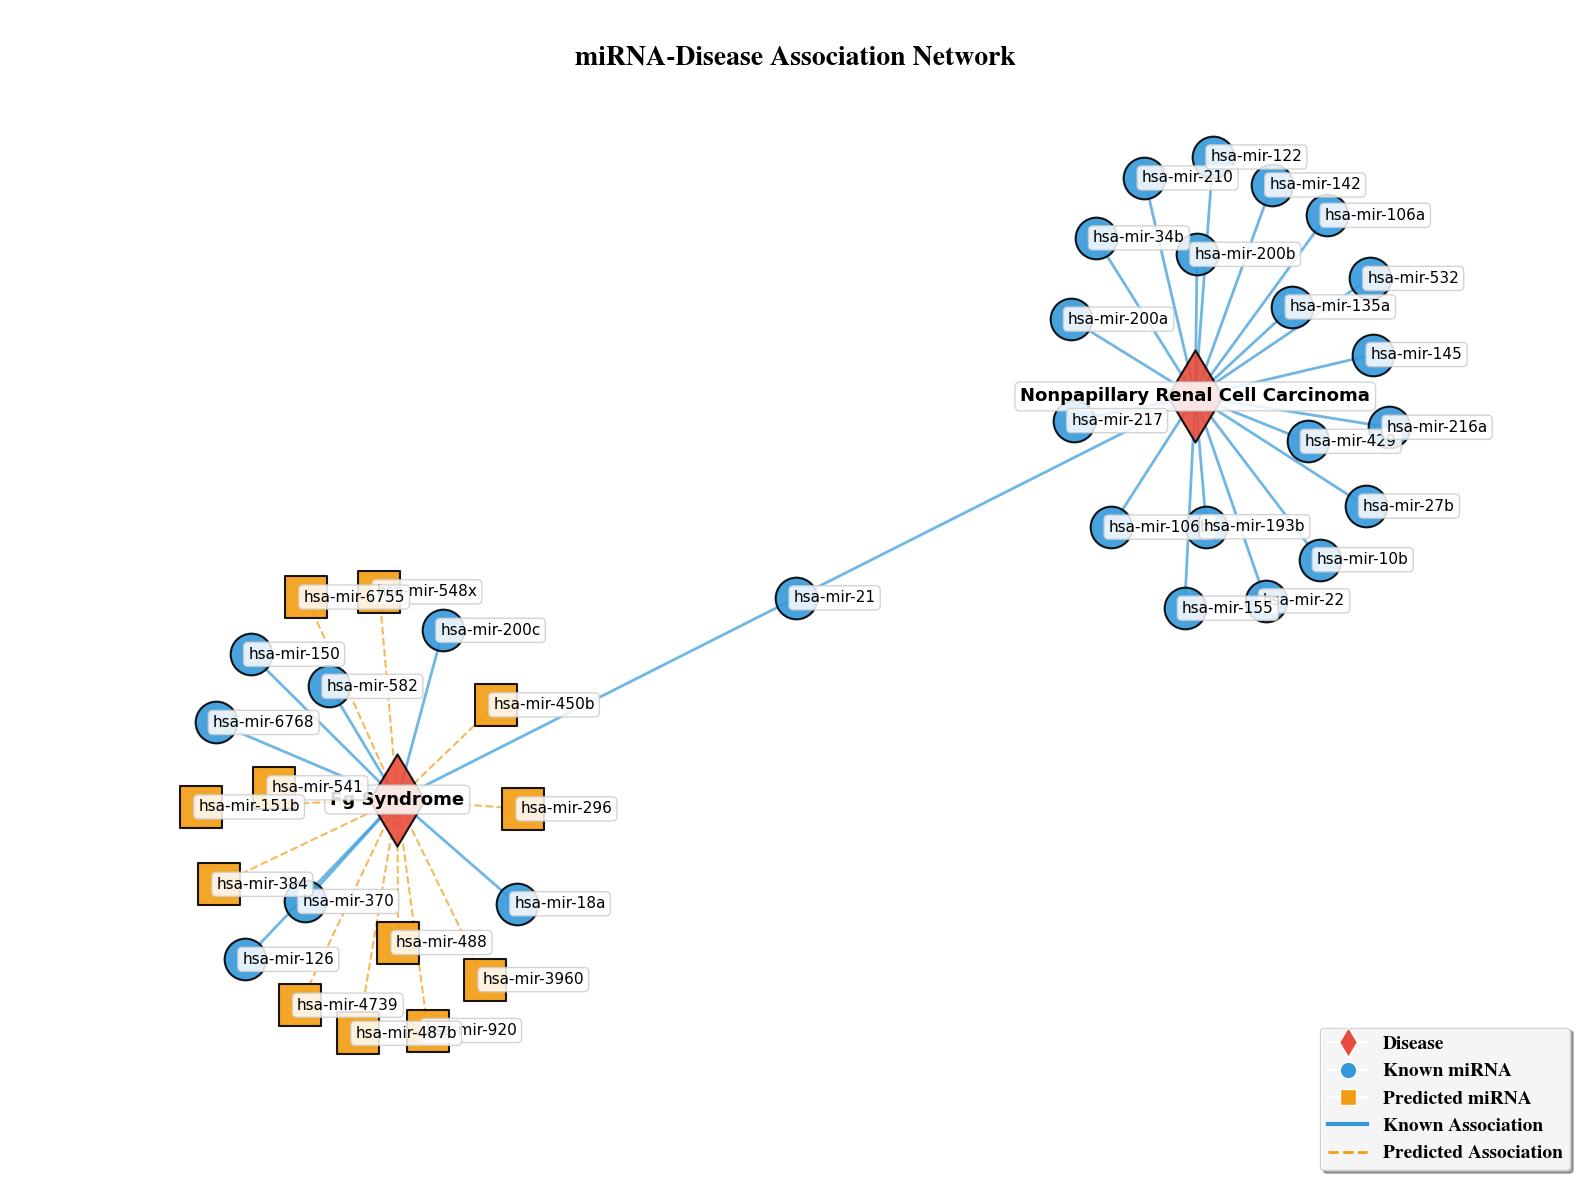

In [11]:
top_20_mirna_names2 = biodata.get_top_mirnas_for_multiple_diseases(['nonpapillary renal cell carcinoma', 'fg syndrome'])
fig = biodata.visualize_mirna_disease_graph(top_20_mirna_names2)
fig.savefig(f"./{data_name}_miRNA_disease.png", dpi=300, bbox_inches='tight')  # 保存为PNG格式，300DPI
top_20_mirna_names2.to_csv( f'./{data_name}_case_study.csv')
fig.show()

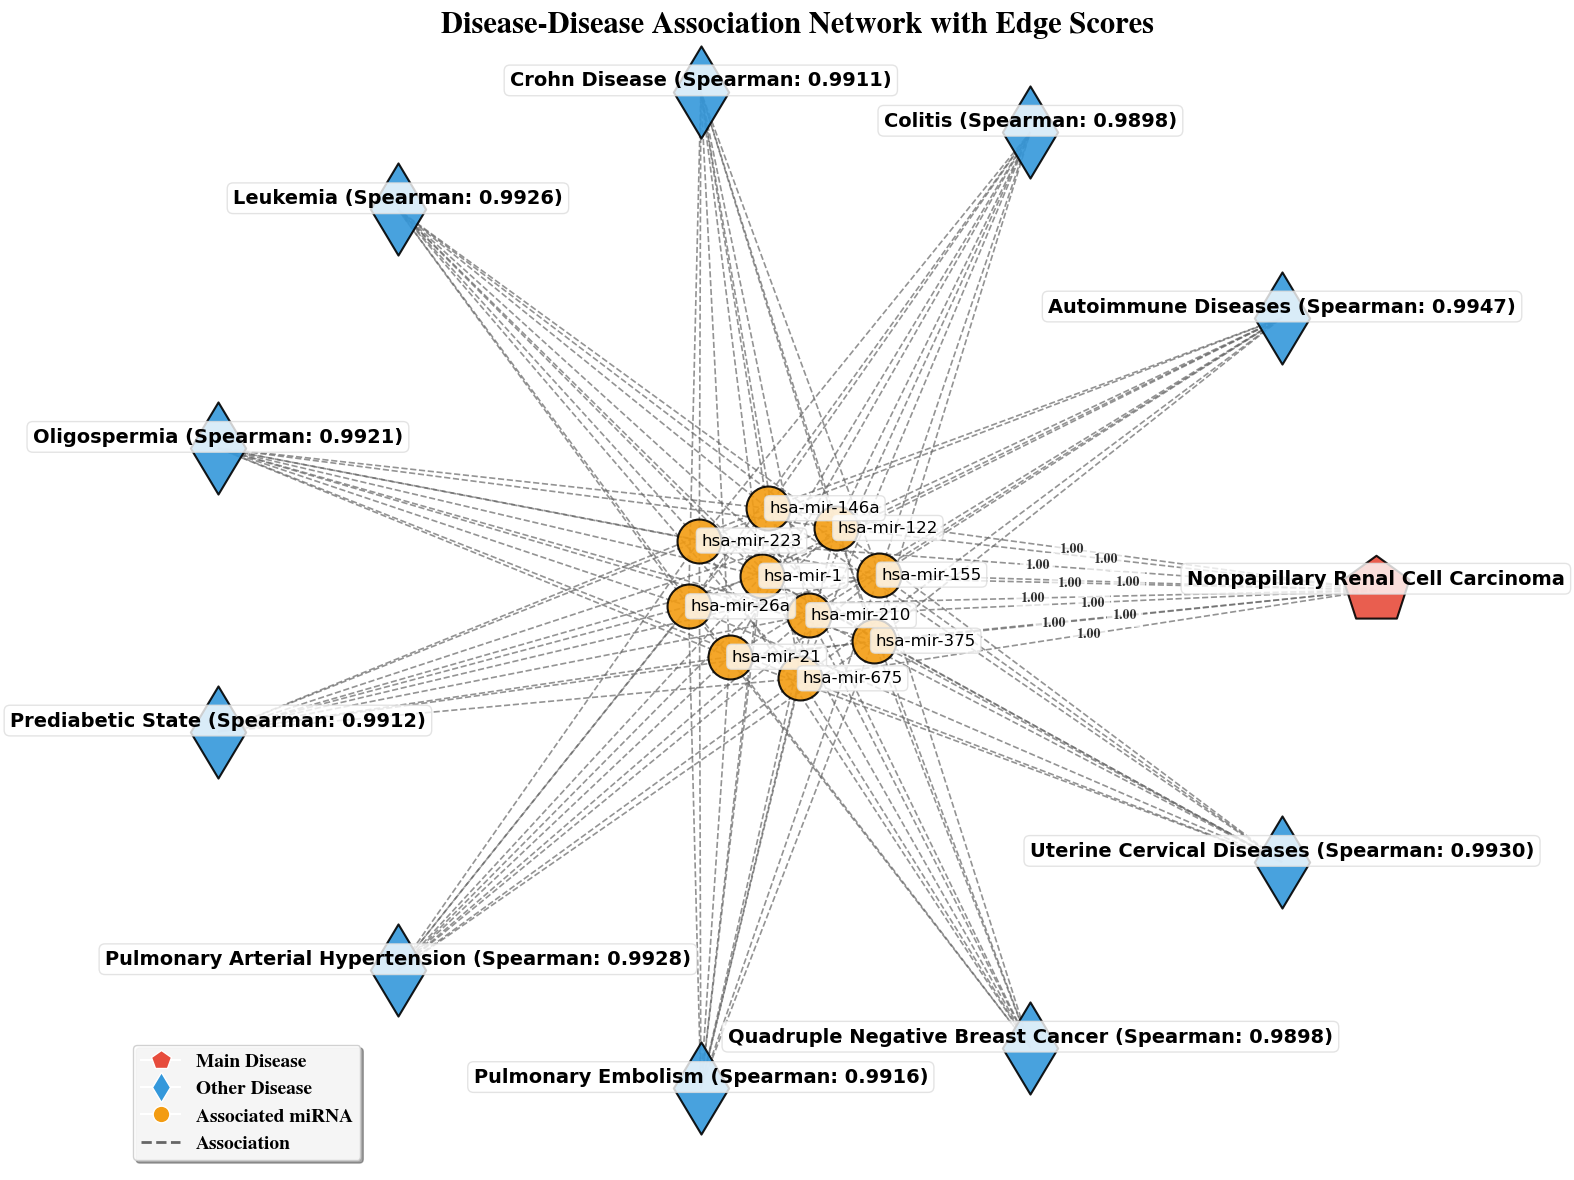

In [12]:
top_20_mirna_names2 = biodata.get_overlapping_disease_for_disease('nonpapillary renal cell carcinoma',top_n_disease=10)
fig = biodata.visualize_disease_disease_graph(top_20_mirna_names2)
fig.savefig(f"./{data_name}_disease_disease.png", dpi=300, bbox_inches='tight')  # 保存为PNG格式，300DPI
fig.show()

In [13]:
biodata.save_AScores('./{data_name}_AScores.emb')